## **In this code, we are going to computing a histogram for each channel of the image.**

First we need to mount our code with google drive.

In [1]:
# To mount code with google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Import all the package that we will use for the code.

In [0]:
# Import the necessary packages
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow

Set the path for the image that we will use for testing the code.

When you mount the code, folder **"drive"** will appear on the left screen when you click the **"file"** symbol. Then you just need to find the image in your drive and right click on that image.

A pop up will show some list then just click **"copy path"**. After that you just need to paste the path here.

In [0]:
# Construct the argument parser and parse the arguments
args = {
	# Task 1
	"image": "/content/drive/My Drive/Colab Notebooks/Image-Processing/flower.jpg"
}

Now that we have the path to the image, we can load it off the disk using the cv2.imread function on Line 1. The cv2.imread function returns a NumPy array representing the image.

Then, displaying the actual image on our screen. The parameter is a reference to the image we loaded before.

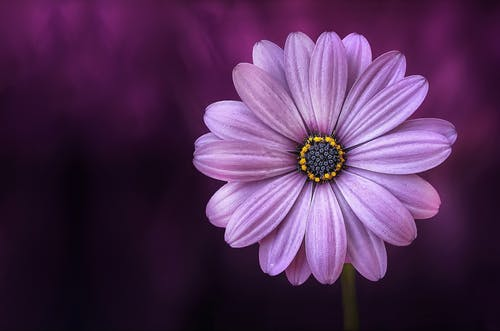

In [4]:
# Task 2
# Load the image and show it here :
image = cv2.imread(args["image"])
cv2_imshow(image)

The ﬁrst thing we are going to do is split the image into its three channels: blue, green, and red. Normally, we read this is red, green, blue (RGB). However, OpenCV stores the image as a NumPy array in reverse order: BGR. This is important to note. We then initialize a tuple of strings representing the colors. We take care of all this on Lines 3-4.

On Lines 5-8 we set up our PyPlot ﬁgure. We’ll plot the bins on the x-axis and the number of pixels placed into each bin on the y-axis.

We then reach a for loop on Line 11, where we start looping over each of the channels in the image.

Then, for each channel, we compute a histogram on Line 13. The code is identical to that of computing a histogram for the grayscale image; however, we are doing it for each Red, Green, and Blue channel, allowing us to characterize the distribution of pixel intensities. We add our histogram to the plot on Line 14.

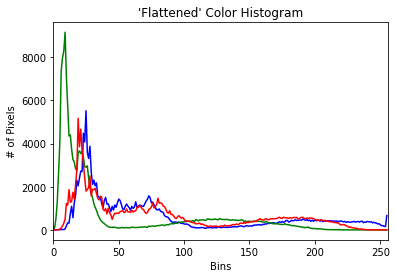

In [5]:
# Grab the image channels, initialize the tuple of colors
# and the figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# Loop over the image channels
for (chan, color) in zip(chans, colors):
	# Create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color = color)
	plt.xlim([0, 256])
 
# Task 3
# Show the plot here :


Let's move on to 2D histograms -- I am reducing the number of bins in the histogram from 256 to 32 so we can better visualize the results.

Plot a 2D color histogram for **green and blue**.

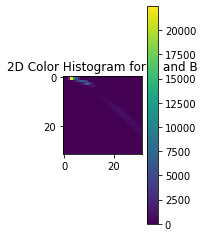

In [6]:
fig = plt.figure()

# Plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Task 4
# Show the plot here :

Let's move on to 2D histograms -- I am reducing the number of bins in the histogram from 256 to 32 so we can better visualize the results.

Plot a 2D color histogram for **green and red**.

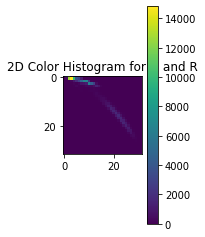

In [7]:
fig = plt.figure()

# Plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Task 5
# Show the plot here :

Let's move on to 2D histograms -- I am reducing the number of bins in the histogram from 256 to 32 so we can better visualize the results.

Plot a 2D color histogram for **blue and red**.

In [0]:
fig = plt.figure()

# Plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
	[32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# Task 6
# Show the plot here :

Examine the dimensionality of one of the 2D histograms

In [0]:
print("2D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

Our 2D histogram could only take into account 2 out of the 3 channels in the image so now let's build a 3D color histogram (utilizing all channels) with 8 bins in each direction -- we can't plot the 3D histogram, but the theory is we'll just show the shape of the histogram 

In [0]:
hist = cv2.calcHist([image], [0, 1, 2],
	None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))